## <span style="color:blue">Introduction to computation in physical sciences</span>
### J Wang and A Wang, [github.com/com-py/intro](https://github.com/com-py/intro) 
### Ch08, `p5-ising`, Ising model

In [1]:
import numpy as np
from numpy.random import random, randint
import matplotlib.pyplot as plt
import matplotlib.animation as am
from matplotlib.widgets import Slider
%matplotlib ipympl

In [2]:
def flip(E):
    kT = slider.val                 # kT from slider
    n = randint(0, N)               # pick one to flip
    dE = 2*spin[n]*(spin[n-1] + spin[(n+1)%N])  # periodic bc
    accept = False
    if (dE <= 0.0): accept = True   # flip if dE<0
    else:                           
        p = np.exp(-dE/kT)          # else flip with exp(-dE/kT)
        if (random() < p): accept = True
    if accept:                      # actual flip
        E = E + dE
        spin[n] = -spin[n]
        xy[n,1] += dy[n]*3.7        # offset y-pos for level arrows
        dy[n] = -dy[n]
    return E

def updatefig(*args):           # update figure data
    global E, m
    E = flip(E)                 # trial flip
    plot.set_offsets(xy)        # update pos/dir
    plot.set_UVC(dx, dy)
    Eavg[m%mc] = E              # last mc points
    m = m+1
    etxt.set_text('E='+repr(sum(Eavg)/mc)[:5])  # 5 digits
    return [plot]   
    
N = 32
spin = [1]*N            # initial spins all up
E = -N
mc = 1000               # running average length
Eavg = [E]*mc
m = 0

xy = np.zeros((N,2))            # (x,y) pos of arrows
xy[:,0] = np.linspace(0,1,N)    # x-pos of arrows
dx = np.zeros(N)                # x offset
dy = 0.02*np.ones(N)            # length of arrow=0.02

<IPython.core.display.Javascript object>


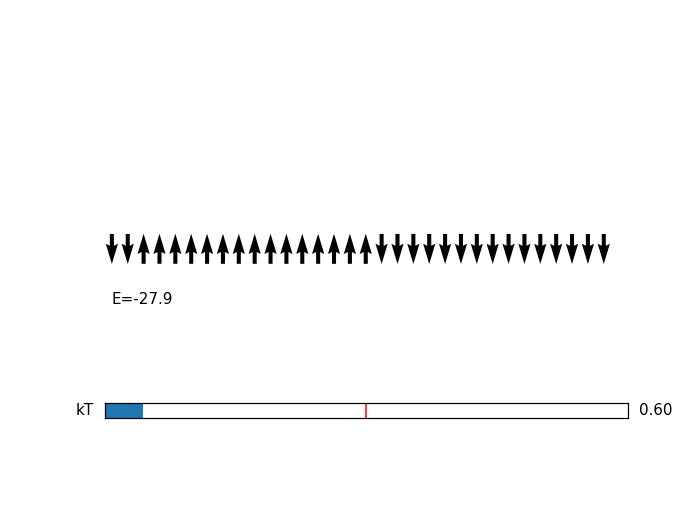

In [3]:
%matplotlib notebook    
fig = plt.figure()
plot = plt.quiver(xy[:,0], xy[:,1], dx, dy)
ani = am.FuncAnimation(fig, updatefig, interval=1)      # animate
etxt = plt.text(0, -.1, '', color='black')              # energy
plt.axis('off')
plt.ylim(-.5,.5)

fig.canvas.set_window_title('Ising model')
axes = fig.add_axes([.15, .20, .75, .03])       # kT slider
slider = Slider(axes, 'kT', 0.01, 8, 4)         # range, init val
plt.show()